* Installing packages
* import pandas
* Series
* DataFrame df


* Reading data from web: pandas.io.data.DataReader
* datetime
* Display DataFrame
* pd.read_csv, df.to_csv
* df.head(), df.tail()
* Get columns: df[[0,3]], df['High'], Single columns Series objects
* Get rows:    df['2012-03'], df.loc, df.iloc, df.ix 
* Concatenate: 
* Merge: Inner and outer joins

Installing Packages and setting up the environment

source activate py27

source activate py35

conda update matplotlib

pip install tzlocal

Creating and working with Series and DataFrame

In [1]:
import pandas as pd

ids = [100, 200, 300, 301, 308]
names  = ['Ali', 'Veli', 'Ayse', 'Fatma', 'Gamze']
surnames  = ['Yilmaz', 'Gorali', 'Tasci', 'Bakkaloglu', 'Yilmaz']
ages   = [27,32,19,28,32]
gender = ['M','M','F','F','F']
city = ['Istanbul', 'Istanbul', 'Ankara', 'Istanbul', 'Izmir']

number_plate = [('Adana','01'), ('Eskisehir','26'), ('Istanbul', '34'), ('Ankara', '06'), ('Izmir', '35'), ('Denizli','20') ]
s = pd.Series(names)


In [2]:
df = pd.DataFrame(data={'Name': names, 'Surname': surnames, 'Age': ages, 'Gender': gender, 'City': city},
                  index=ids)
#df1 = df[[3,0,2,1]]
df1 = df
df = pd.DataFrame(number_plate, columns=['City','Plate'])
df2 = df

In [5]:
df1

,Age,City,Gender,Name,Surname
100,27,Istanbul,M,Ali,Yilmaz
200,32,Istanbul,M,Veli,Gorali
300,19,Ankara,F,Ayse,Tasci
301,28,Istanbul,F,Fatma,Bakkaloglu
308,32,Izmir,F,Gamze,Yilmaz


In [4]:
df2

,City,Plate
0,Adana,01
1,Eskisehir,26
2,Istanbul,34
3,Ankara,06
4,Izmir,35
5,Denizli,20


In [142]:
pd.merge(df1, df2, on='City',  how='inner')


,Age,City,Gender,Name,Surname,Plate
0,27,Istanbul,M,Ali,Yilmaz,34
1,32,Istanbul,M,Veli,Gorali,34
2,28,Istanbul,F,Fatma,Bakkaloglu,34
3,19,Ankara,F,Ayse,Tasci,06
4,32,Izmir,F,Gamze,Yilmaz,35


In [146]:
pd.merge(df1, df2, how='outer').sort_values('Plate')


,Age,City,Gender,Name,Surname,Plate
5,NaN,Adana,NaN,NaN,NaN,01
3,19.0,Ankara,F,Ayse,Tasci,06
7,NaN,Denizli,NaN,NaN,NaN,20
6,NaN,Eskisehir,NaN,NaN,NaN,26
0,27.0,Istanbul,M,Ali,Yilmaz,34
1,32.0,Istanbul,M,Veli,Gorali,34
2,28.0,Istanbul,F,Fatma,Bakkaloglu,34
4,32.0,Izmir,F,Gamze,Yilmaz,35


In [113]:
df1.sort_values('Age')

,Name,Age,Gender,City
2,Ayse,19,F,Ankara
0,Ali,27,M,Istanbul
3,Fatma,28,F,Istanbul
1,Veli,32,M,Istanbul
4,Gamze,32,F,Izmir


In [114]:
df1.sort_values('City')

,Name,Age,Gender,City
2,Ayse,19,F,Ankara
0,Ali,27,M,Istanbul
1,Veli,32,M,Istanbul
3,Fatma,28,F,Istanbul
4,Gamze,32,F,Izmir


In [149]:
df1['Surname'].value_counts().sort_values()

Bakkaloglu    1
Gorali        1
Tasci         1
Yilmaz        2
Name: Surname, dtype: int64

In [150]:
df1['Gender'].value_counts().sort_values()

M    2
F    3
Name: Gender, dtype: int64

In [153]:
df1.index.get_loc(300)

2

In [154]:
df1.at[100, 'Name']

'Ali'

In [157]:
print(df1)
df1.iat[0,1]

     Age      City Gender   Name     Surname
100   27  Istanbul      M    Ali      Yilmaz
200   32  Istanbul      M   Veli      Gorali
300   19    Ankara      F   Ayse       Tasci
301   28  Istanbul      F  Fatma  Bakkaloglu
308   32     Izmir      F  Gamze      Yilmaz


'Istanbul'

In [159]:
df1[(df1.Age<30) & (df1.City == 'Istanbul')]

,Age,City,Gender,Name,Surname
100,27,Istanbul,M,Ali,Yilmaz
301,28,Istanbul,F,Fatma,Bakkaloglu


Subframe

In [174]:
sdf1 = df1[['Name','Surname']].ix[100:300]



,Name,Surname
100,Ali,Yilmaz
200,Veli,Gorali
300,Ayse,Tasci


In [193]:
s  =pd.Series([3.2,3,1,10,4],index=['A','B','C','D','E'])
print(s)
q = s.reindex(['A','C','E','F'])
print(q)

u = pd.DataFrame({'s': s, 'q': q})

A     3.2
B     3.0
C     1.0
D    10.0
E     4.0
dtype: float64
A    3.2
C    1.0
E    4.0
F    NaN
dtype: float64


In [203]:
#letters = [(c,chr(c)) for c in range(65,91)  ]
letters = [chr(c) for c in range(65,91)  ]
letters
u.reindex(letters)

,q,s
A,3.2,3.2
B,NaN,3.0
C,1.0,1.0
D,NaN,10.0
E,4.0,4.0
F,NaN,NaN
G,NaN,NaN
H,NaN,NaN
I,NaN,NaN
J,NaN,NaN


Lets load some data from the web

In [18]:
import pandas as pd
import pandas.io.data as web

import datetime

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2016, 11, 18)
msft = web.DataReader("MSFT", 'yahoo', start, end)
aapl = web.DataReader("AAPL", 'yahoo', start, end)



Display

In [14]:
print(msft[['Open','Close']])

                 Open      Close
Date                            
2012-01-03  26.549999  26.770000
2012-01-04  26.820000  27.400000
2012-01-05  27.379999  27.680000
2012-01-06  27.530001  28.110001
2012-01-09  28.049999  27.740000
2012-01-10  27.930000  27.840000
2012-01-11  27.430000  27.719999
2012-01-12  27.870001  28.000000
2012-01-13  27.930000  28.250000
2012-01-17  28.400000  28.260000
2012-01-18  28.309999  28.230000
2012-01-19  28.160000  28.120001
2012-01-20  28.820000  29.709999
2012-01-23  29.549999  29.730000
2012-01-24  29.469999  29.340000
2012-01-25  29.070000  29.559999
2012-01-26  29.610001  29.500000
2012-01-27  29.450001  29.230000
2012-01-30  28.969999  29.610001
2012-01-31  29.660000  29.530001
2012-02-01  29.790001  29.889999
2012-02-02  29.900000  29.950001
2012-02-03  30.139999  30.240000
2012-02-06  30.040001  30.200001
2012-02-07  30.150000  30.350000
2012-02-08  30.260000  30.660000
2012-02-09  30.680000  30.770000
2012-02-10  30.639999  30.500000
2012-02-13

Optionally save to a csv file

In [3]:
msft.to_csv("msft.csv")
aapl.to_csv("aapl.csv")

Read from file

In [7]:
msft2 = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl2 = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)

Check that data is the same

In [11]:
print(msft2.head())
print(msft.head())

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  64731500  23.461752
2012-01-04  26.820000  27.469999  26.780001  27.400000  80516100  24.013895
2012-01-05  27.379999  27.730000  27.290001  27.680000  56081400  24.259293
2012-01-06  27.530001  28.190001  27.530001  28.110001  99455500  24.636154
2012-01-09  28.049999  28.100000  27.719999  27.740000  59706800  24.311878
                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  26.549999  26.959999  26.389999  26.770000  64731500  23.461752
2012-01-04  26.820000  27.469999  26.780001  27.400000  80516100  24.013895
2012-01-05  27.379999  27.730000  27.290001  27.680000  56081400  24.259293
2012-01-06  27.530001  28.190001  27.530001  28.110001  99455500  24.636154
2012-01-09  

Get columns. Each column is a series object.

In [16]:
Open = msft[[0]]
High = msft['High']
print(Open[0:3])


                 Open
Date                 
2012-01-03  26.549999
2012-01-04  26.820000
2012-01-05  27.379999


In [37]:
msftA01 = msft.loc['2012-01'][['Adj Close']]
msftA02 = msft['2012-02'][['Adj Close']]
aaplA01 = aapl['2012-01'][['Adj Close']]

msftAV = msft['2012-01'][['Adj Close','Volume']]
aaplAV = aapl['2012-01'][['Adj Close','Volume']]

In [64]:
msftA01

,Adj Close
Date,
2012-01-03,23.461752
2012-01-04,24.013895
2012-01-05,24.259293
2012-01-06,24.636154
2012-01-09,24.311878
2012-01-10,24.399520
2012-01-11,24.294349
2012-01-12,24.539747
2012-01-13,24.758852


In [84]:
msft[['Volume','Close']]

,Volume,Close
Date,,
2012-01-03,64731500,26.770000
2012-01-04,80516100,27.400000
2012-01-05,56081400,27.680000
2012-01-06,99455500,28.110001
2012-01-09,59706800,27.740000
2012-01-10,60014400,27.840000
2012-01-11,65582400,27.719999
2012-01-12,49370800,28.000000
2012-01-13,60196100,28.250000


Concatenate

In [22]:
pd.concat([msftA01.head(3), msftA02.head(3)])

,Adj Close
Date,
2012-01-03,23.461752
2012-01-04,24.013895
2012-01-05,24.259293
2012-02-01,26.196180
2012-02-02,26.248766
2012-02-03,26.502927


In [29]:
withDups = pd.concat([aaplA01[:3], msftA01[:3]])
print(withDups)

withDups.ix['2012-01-04']


            Adj Close
Date                 
2012-01-03  53.784500
2012-01-04  54.073546
2012-01-05  54.673867
2012-01-03  23.461752
2012-01-04  24.013895
2012-01-05  24.259293


,Adj Close
Date,
2012-01-04,54.073546
2012-01-04,24.013895


Multiindex

In [44]:
withDups = pd.concat([aaplA01[:3], msftA01[:3]],keys=['AAPL', 'MSFT'])

print(withDups)
print(withDups.ix['AAPL'])

                 Adj Close
     Date                 
AAPL 2012-01-03  53.784500
     2012-01-04  54.073546
     2012-01-05  54.673867
MSFT 2012-01-03  23.461752
     2012-01-04  24.013895
     2012-01-05  24.259293
            Adj Close
Date                 
2012-01-03  53.784500
2012-01-04  54.073546
2012-01-05  54.673867


In [56]:
u = pd.concat([msftAV, aaplAV], keys = ['MSFT','AAPL'])
u.loc['MSFT'].loc['2012-01']

,Adj Close,Volume
Date,,
2012-01-03,23.461752,64731500
2012-01-04,24.013895,80516100
2012-01-05,24.259293,56081400
2012-01-06,24.636154,99455500
2012-01-09,24.311878,59706800
2012-01-10,24.399520,60014400
2012-01-11,24.294349,65582400
2012-01-12,24.539747,49370800
2012-01-13,24.758852,60196100


Merge: Inner and outer joins

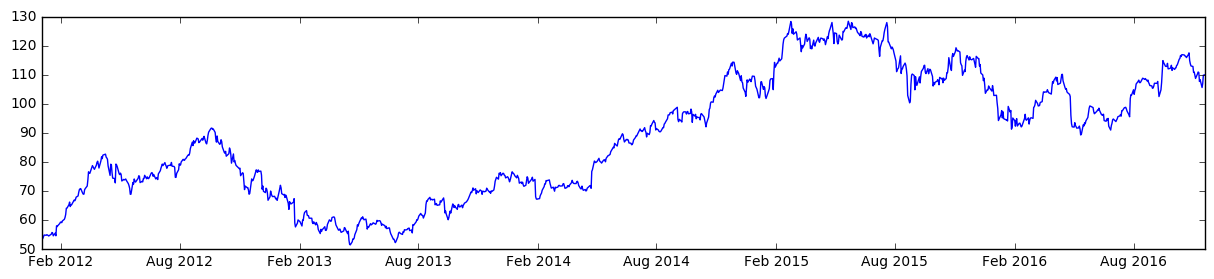

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
plt.plot(aapl[['Adj Close']])
plt.show()

In [29]:
msft.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [33]:
msft2 = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
msft2

,Open,High,Low,Close,Volume,AdjClose
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,64731500,23.461752
2012-01-04,26.820000,27.469999,26.780001,27.400000,80516100,24.013895
2012-01-05,27.379999,27.730000,27.290001,27.680000,56081400,24.259293
2012-01-06,27.530001,28.190001,27.530001,28.110001,99455500,24.636154
2012-01-09,28.049999,28.100000,27.719999,27.740000,59706800,24.311878
2012-01-10,27.930000,28.150000,27.750000,27.840000,60014400,24.399520
2012-01-11,27.430000,27.980000,27.370001,27.719999,65582400,24.294349
2012-01-12,27.870001,28.020000,27.650000,28.000000,49370800,24.539747
2012-01-13,27.930000,28.250000,27.790001,28.250000,60196100,24.758852


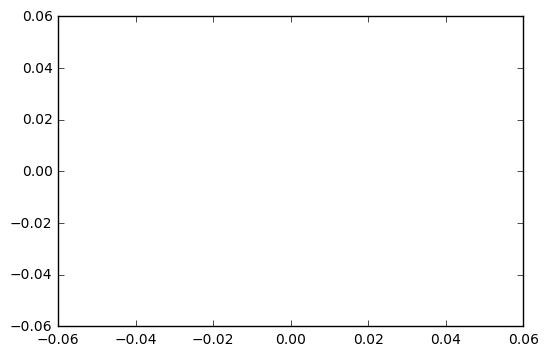

In [53]:
plt.plot(aapl['2018-02-03':'2018-05-07']['Volume'])


plt.plot(y['Volume'])
plt.show()

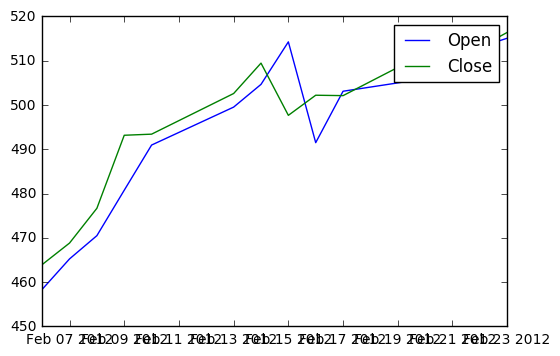

In [69]:
x = aapl['2012-02-05':'2012-02-23']['Open']
y = aapl['2012-02-05':'2012-02-23']['Close']
Vol = aapl['2012-02-05':'2012-02-23']['Volume']

plt.plot(x)
plt.plot(y)
plt.legend()
plt.show()

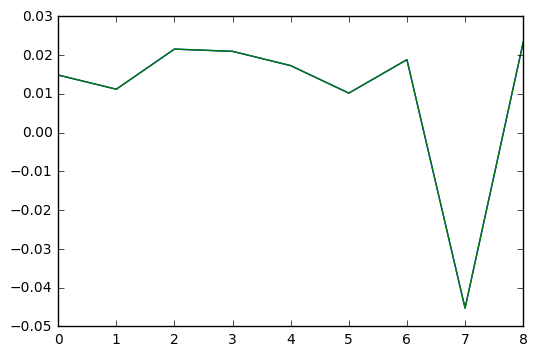

In [78]:
import numpy as np
plt.plot(np.log(np.array(x.ix[1:10])/np.array(x.ix[0:9])))
plt.show()

Write a program that visualizes a candle stick plot from aapl or msft 

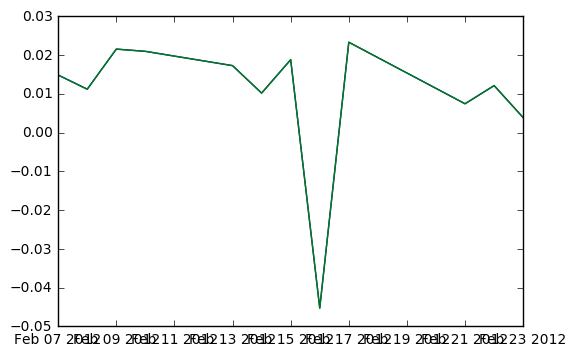

In [82]:
plt.plot(np.log(x).diff())
plt.show()